# Offline-capable LTER map using Basemap and USGS topo data

Adapted from a notebook by Rich Signell (NOAA)

In [3]:
# hacky fix for bug in basemap under Anaconda, your path will be different
import os
os.environ["PROJ_LIB"] = r"C:\Users\joefutrelle\Anaconda2\envs\maptest\Library\share"

import numpy as np
import matplotlib.pyplot as plt
import urllib
import netCDF4
from mpl_toolkits.basemap import Basemap

Here we download NetCDF data from NOAA, the offline version will have the file already staged.

In [4]:
# Define the location of interest
minlon, maxlon, minlat, maxlat = -72, -69.5, 39.5, 41.75

isub = 1
 
# Read data from: http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.html
# using the netCDF output option
base_url='https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.nc?'
query='topo[(%f):%d:(%f)][(%f):%d:(%f)]' % (maxlat,isub,minlat,minlon,isub,maxlon)
url = base_url+query
url

'https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.nc?topo[(41.750000):1:(39.500000)][(-72.000000):1:(-69.500000)]'

In [5]:
# store data in NetCDF file
file='usgsCeSrtm30v6.nc'
import urllib.request
if not os.path.exists(file):
    data = urllib.request.urlretrieve(url, file)

The NetCDF file contains topographic data (including bathymetry) for the LTER region

In [6]:
# open NetCDF data in 
nc = netCDF4.Dataset(file)
ncv = nc.variables
ncv.keys()

odict_keys(['latitude', 'longitude', 'topo'])

In [7]:
lon = ncv['longitude'][:]
lat = ncv['latitude'][:]
lons, lats = np.meshgrid(lon,lat)
topo = ncv['topo'][:,:]

In [8]:
topo = 0-topo # convert Z to depth (positive down)

Draw the map. The map has the following layers:
* Landmasses from basemap
* Bathymetry from the NOAA data represented in shades of blue
* The above bathymetry represented as contour lines

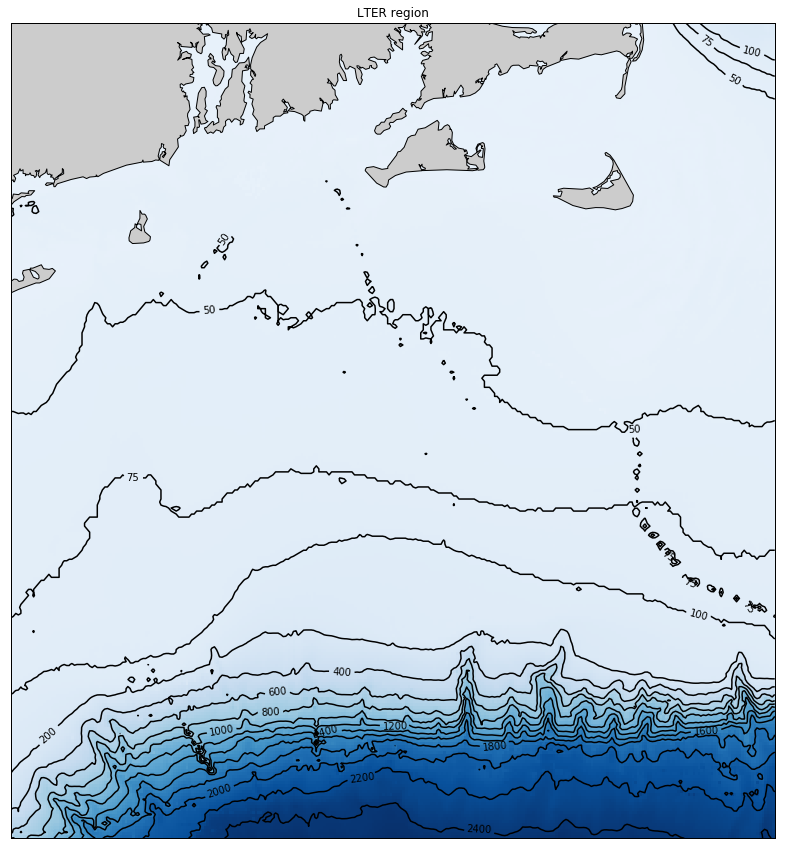

In [19]:
# Create map
contour_levels = [50, 75, 100, 200, 400] + [(i+3)*200 for i in range(13)]
m = Basemap(projection='mill', llcrnrlat=minlat,urcrnrlat=maxlat,llcrnrlon=minlon, urcrnrlon=maxlon,resolution='h')
fig1 = plt.figure(figsize=(15,15))
cs = m.pcolormesh(lons,lats,topo,cmap=plt.cm.Blues,latlon=True)
contour = m.contour(lons,lats,topo,contour_levels,latlon=True,colors='k')
plt.clabel(contour,fmt='%1.0f')
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
plt.title('LTER region')
 
# Save figure (without 'white' borders)
plt.savefig('topo.png', bbox_inches='tight')